In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Loading the data
data = pd.read_csv("/content/survey.csv")

In [33]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [34]:
#Gathering data information
print("Dataframe Shape:",data.shape)
data.info()

Dataframe Shape: (1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non

# Data Analysis and Preprocessing

---


## Data Cleaning & Preprocessing


1.    Drop irrelevant columns (e.g., Timestamp, comments)
2.   Assign default values for each data type and filling Null values
3. Cleaing Gender Column into 3 values ['female' 'male' 'trans']
4. Filling the default values/Nan Values with meaning full data.


In [35]:
# 1. Data Cleaning & Preprocessing
# Drop irrelevant columns (e.g., Timestamp, comments)
data = data.drop(columns=["Timestamp", "comments","Country","state"])


In [36]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data type
intFeatures = ['Age']
stringFeatures = ['Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']  # Added 'state' here
floatFeatures = []

# Fill missing values
for feature in data:
    if feature in intFeatures:
        data.loc[:, feature] = data[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        data.loc[:, feature] = data[feature].fillna(defaultString)
    elif feature in floatFeatures:
        data.loc[:, feature] = data[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)

In [37]:
#unique values for data["Gender"]

print(data["Gender"].unique())


['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [38]:
# Convert 'Gender' column to string type before applying .str.lower()
data['Gender'] = data['Gender'].astype(str)

gender = data['Gender'].str.lower() #lower case all column's elements

gender = data['Gender'].unique() #Select unique elements

# Convert 'Gender' column to string type before applying .str.lower()
data['Gender'] = data['Gender'].astype(str)

gender = data['Gender'].str.lower() #lower case all column's elements

gender = data['Gender'].unique() #Select unique elements

# Making gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in data.iterrows():

    if str.lower(col.Gender) in male_str:
        data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        # Corrected: Use data instead of DataFrame
        data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

# Removing invalid values
stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

print(data['Gender'].unique())

['female' 'male' 'trans']


In [39]:
# Ensure modification happens in-place
data.loc[:, 'Age'] = data['Age'].mask(data['Age'] < 18, data['Age'].median())
data.loc[:, 'Age'] = data['Age'].mask(data['Age'] > 120, data['Age'].median())

# Assign 'age_range' safely
data = data.copy()  # Avoid chained assignment issues
data['age_range'] = pd.cut(data['Age'],
                           bins=[0, 20, 30, 65, 100],
                           labels=["0-20", "21-30", "31-65", "66-100"],
                           include_lowest=True)


In [40]:
#There are almost negilgable amount of entries of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
data['self_employed'] = data['self_employed'].replace([defaultString], 'No')
print(data['self_employed'].unique())

['No' 'Yes']


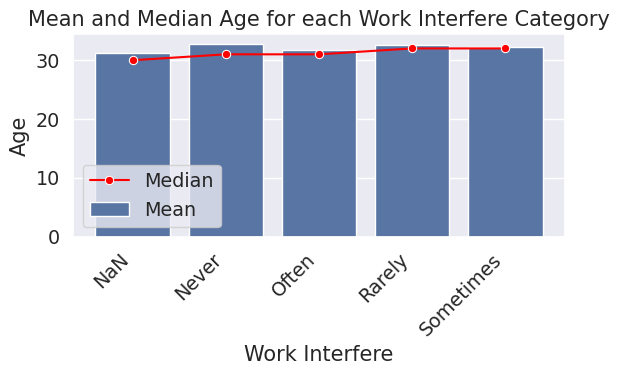

,mean,median
work_interfere,,
NaN,31.151515,30.0
Never,32.755869,31.0
Often,31.732394,31.0
Rarely,32.601156,32.0
Sometimes,32.187097,32.0


In [41]:
# Calculate mean and median for each unique value in 'work_interfere'
work_interfere_stats = data.groupby('work_interfere')['Age'].agg(['mean', 'median'])

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=work_interfere_stats.index, y=work_interfere_stats['mean'], label='Mean')
sns.lineplot(x=work_interfere_stats.index, y=work_interfere_stats['median'], marker='o', color='red', label='Median')
plt.xlabel('Work Interfere')
plt.ylabel('Age')
plt.title('Mean and Median Age for each Work Interfere Category')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

work_interfere_stats


In [42]:
# Calculate the percentage of 'NaN' values in the 'work_interfere' column
nan_percentage = (data['work_interfere'].value_counts(normalize=True) * 100)['NaN']

print(f"Percentage of 'NaN' values in 'work_interfere': {nan_percentage:.2f}%")


Percentage of 'NaN' values in 'work_interfere': 21.00%


In [43]:
#There are only 21% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

data['work_interfere'] = data['work_interfere'].replace([defaultString], "Don't know" ) # Changed mentalhealth_df to data
print(data['work_interfere'].unique()) # Changed mentalhealth_df to data

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [44]:
from sklearn import preprocessing # make sure to import preprocessing


labelDictionary = {}
for feature in data: # Change mentalhealth_df to data
    le = preprocessing.LabelEncoder()
    le.fit(data[feature]) # Change mentalhealth_df to data
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature]) # Change mentalhealth_df to data
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDictionary[labelKey] =labelValue

for key, value in labelDictionary.items():
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_cow

In [45]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [46]:
#unique values for each colomn in the dataframe
for col in data.columns:
    print(f"{col}': {data[col].unique()}")


Age': [19 26 14 13 15 17 21 24  5 11 18  9 28 23 16 12 22 20 32  6  0 10  8  4
  1  7 27  3 25 37 40 35 36 30  2 38 39 29 42 33 43 31 34 41 44]
Gender': [0 1 2]
self_employed': [0 1]
family_history': [0 1]
treatment': [1 0]
work_interfere': [2 3 1 4 0]
no_employees': [4 5 2 1 0 3]
remote_work': [0 1]
tech_company': [1 0]
benefits': [2 0 1]
care_options': [1 0 2]
wellness_program': [1 0 2]
seek_help': [2 0 1]
anonymity': [2 0 1]
leave': [2 0 1 3 4]
mental_health_consequence': [1 0 2]
phys_health_consequence': [1 2 0]
coworkers': [1 0 2]
supervisor': [2 0 1]
mental_health_interview': [1 2 0]
phys_health_interview': [0 1 2]
mental_vs_physical': [2 0 1]
obs_consequence': [0 1]
age_range': [2 1 0 3]


# Exploratory Data Analysis (EDA)
## Correlation matrix
A correlation matrix helps identify relationships between features and the target variable (treatment). This can reveal important patterns, such as which factors are most associated with seeking mental health treatment. It also helps in feature selection by identifying highly correlated features, reducing multicollinearity, and improving model performance.

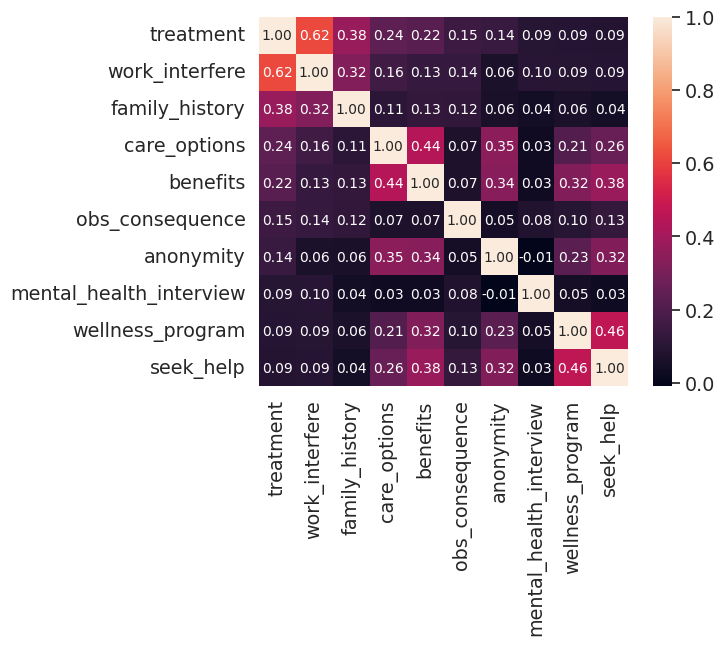

In [47]:
#treatment correlation matrix
import pandas as pd # Make sure pandas is imported
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corrmat = data.corr() # Assuming 'data' is your DataFrame

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(data[cols].values.T) # Assuming 'data' is your DataFrame
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Analyze the distribution and skewness
Detect Skewness – Identify whether a feature is normally distributed or skewed (left or right).
Understand Data Spread – Ensure appropriate feature scaling and normalization strategies.

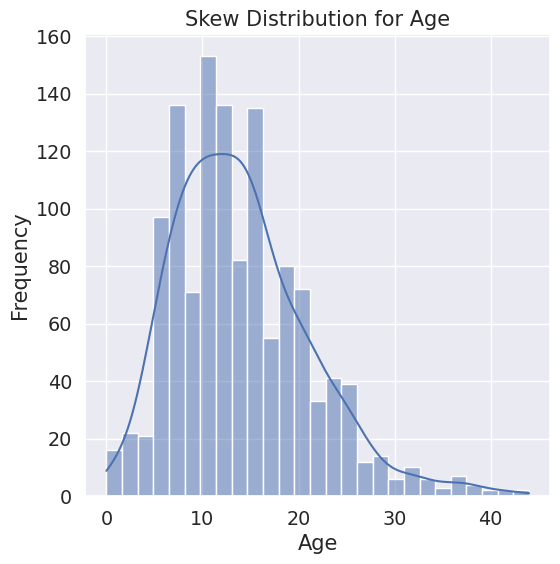

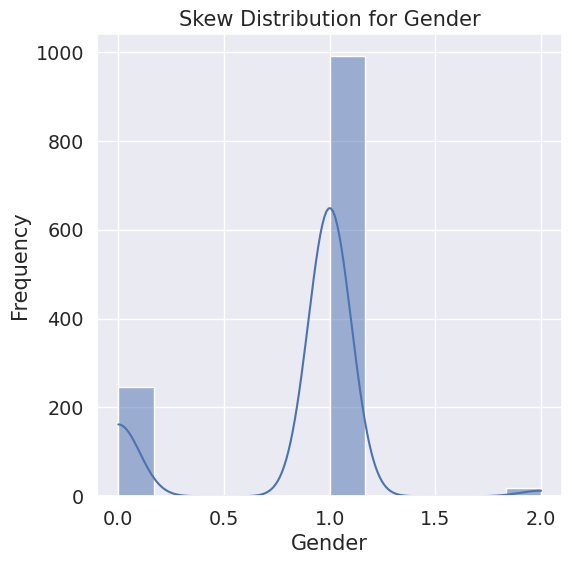

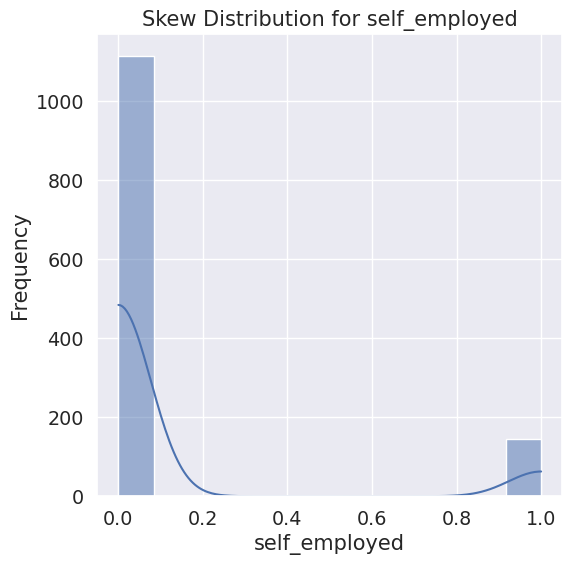

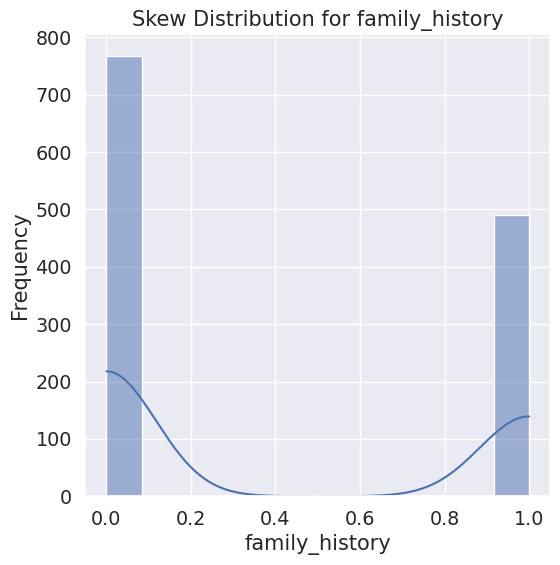

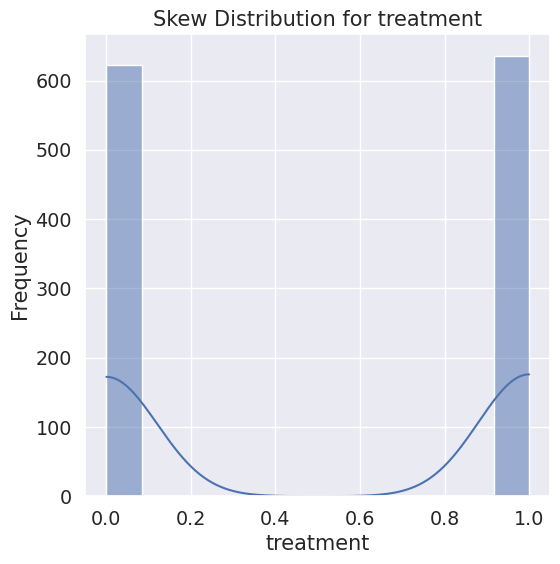

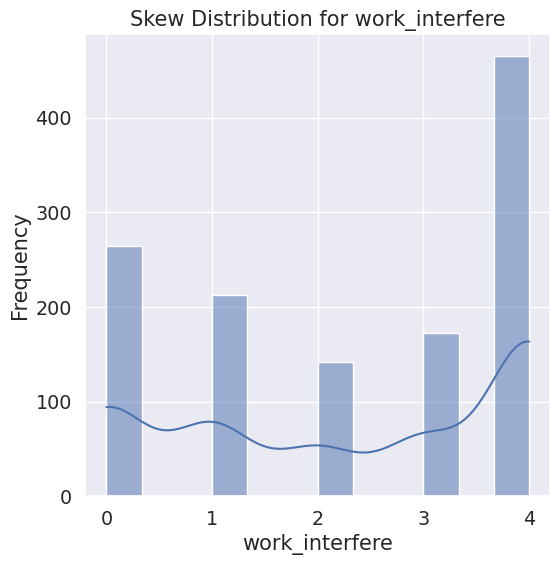

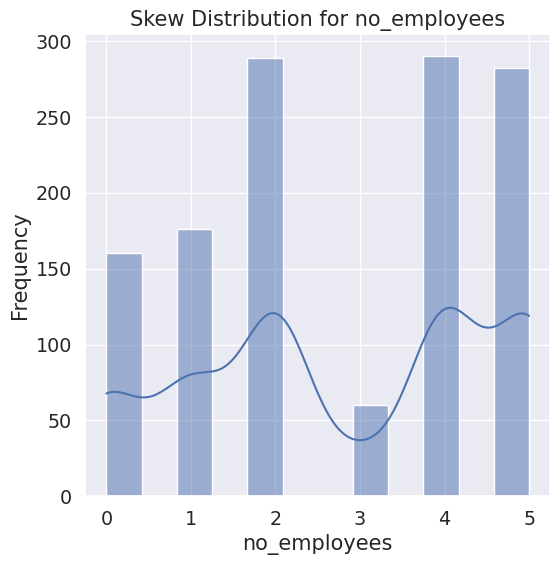

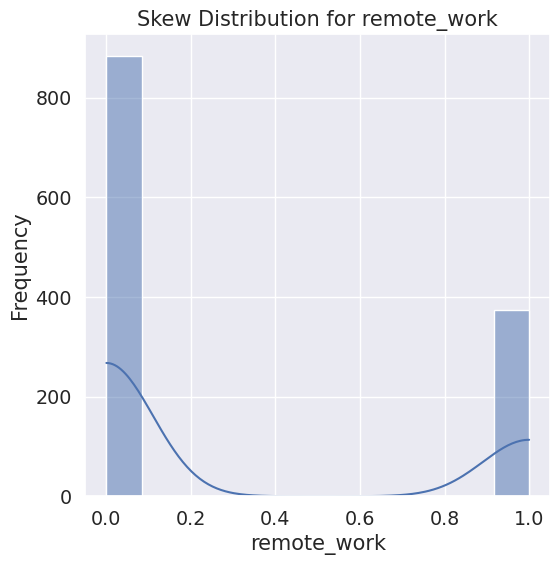

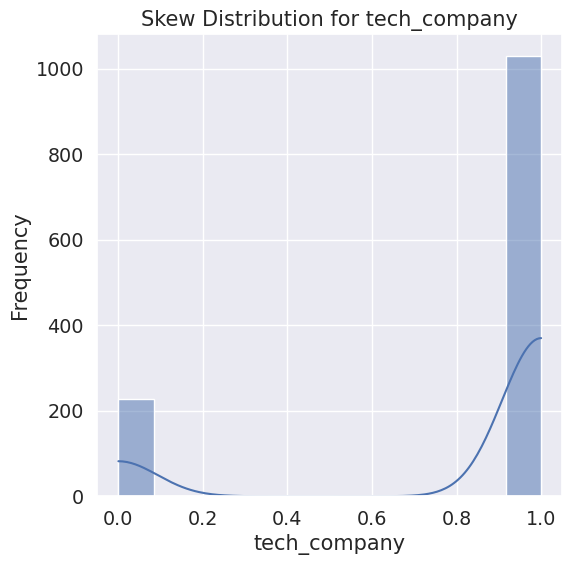

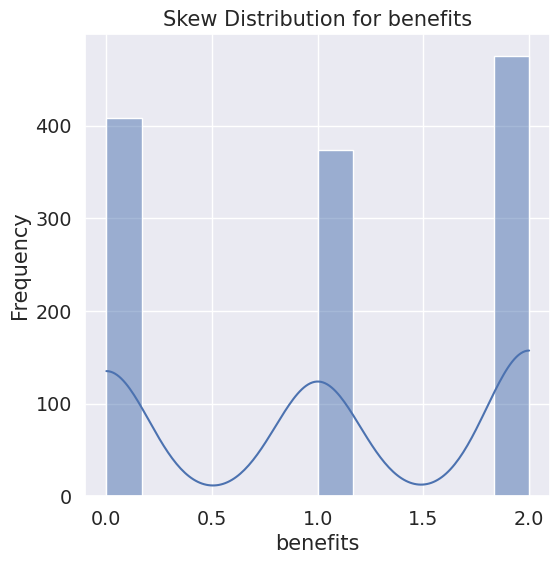

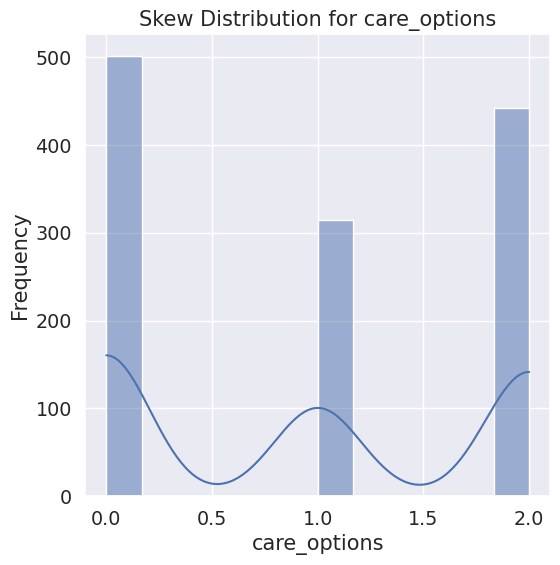

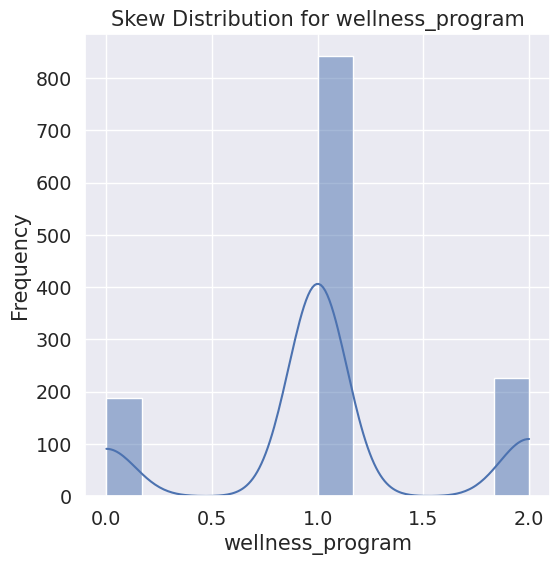

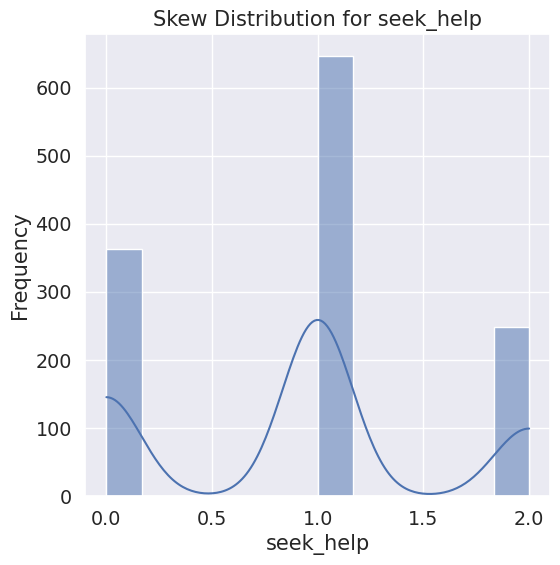

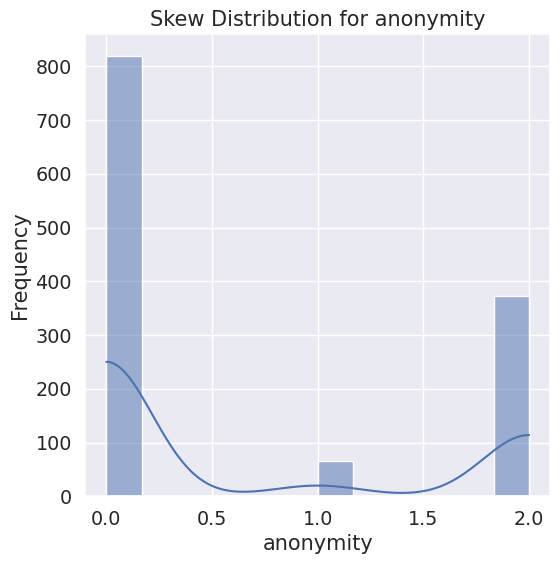

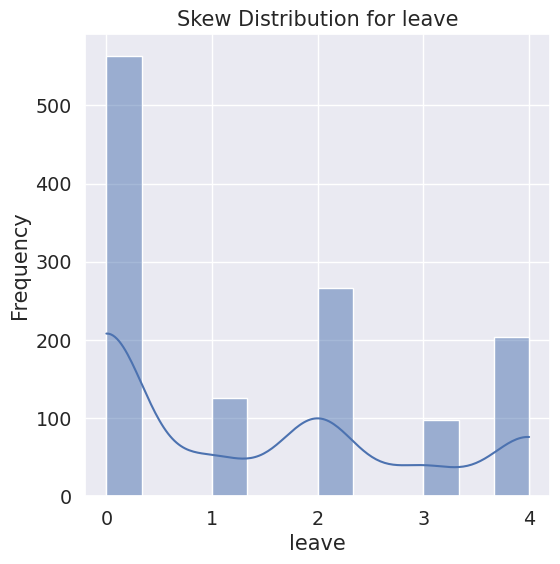

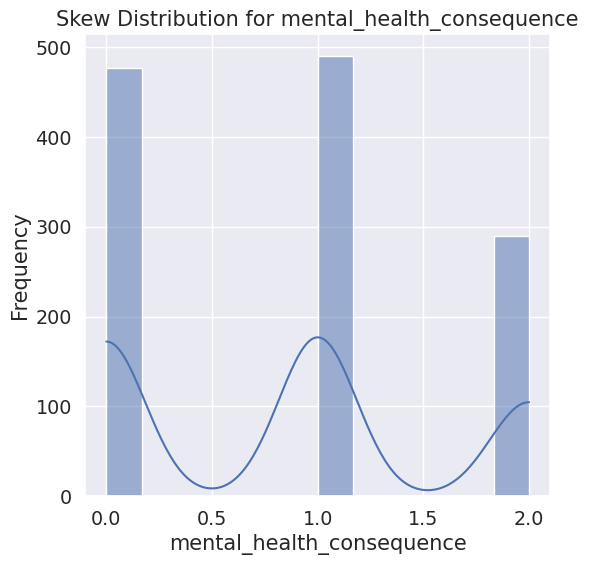

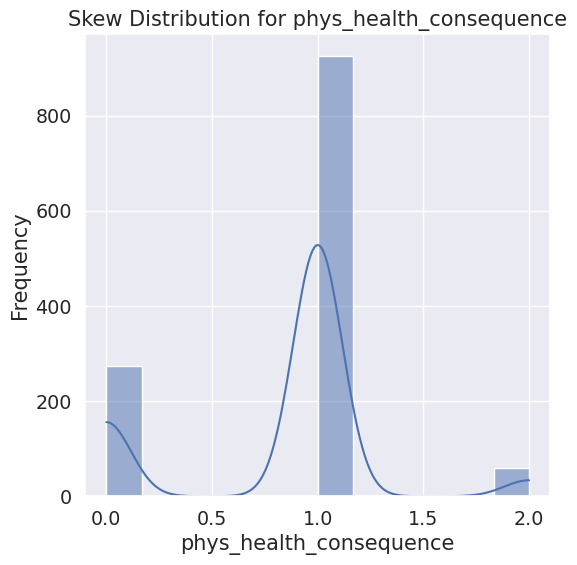

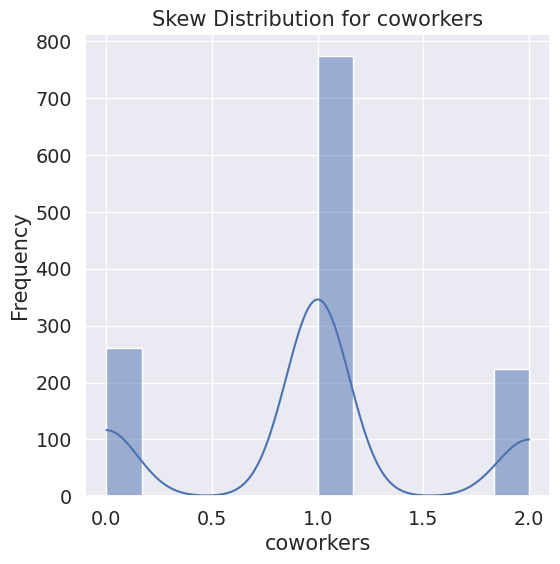

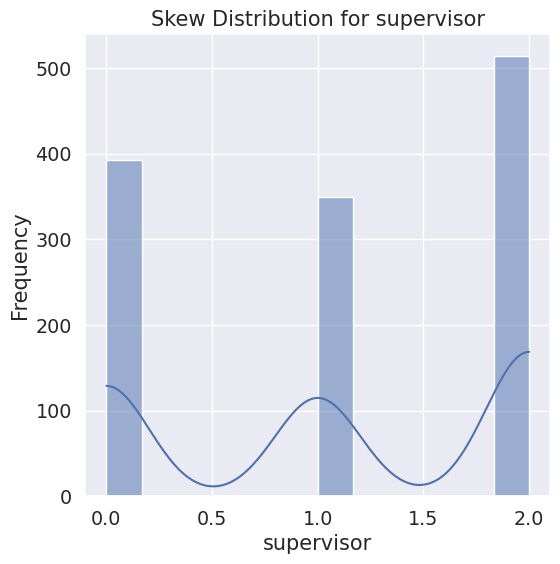

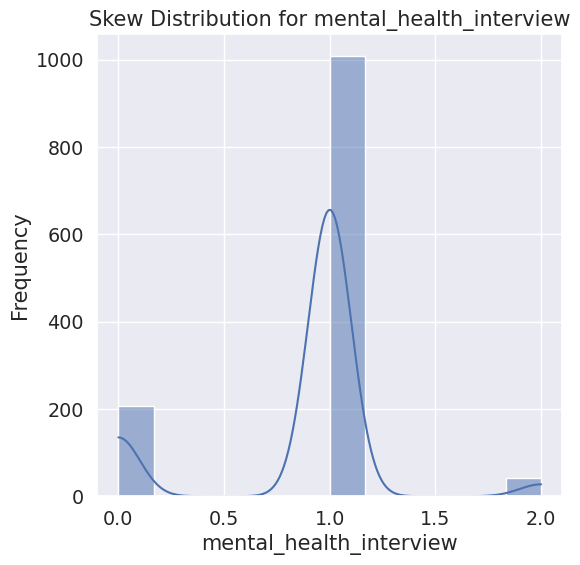

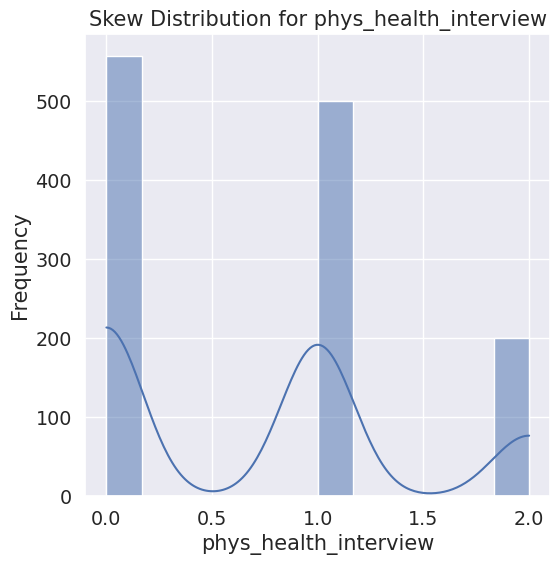

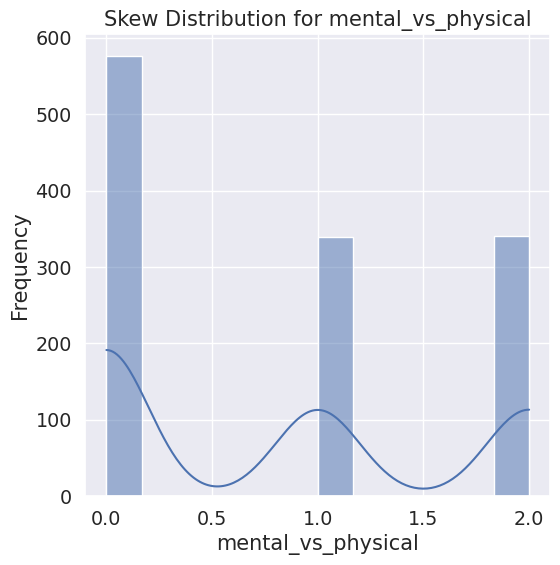

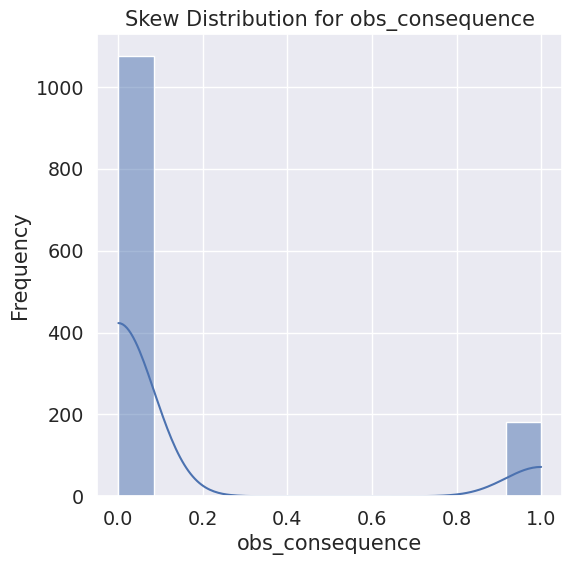

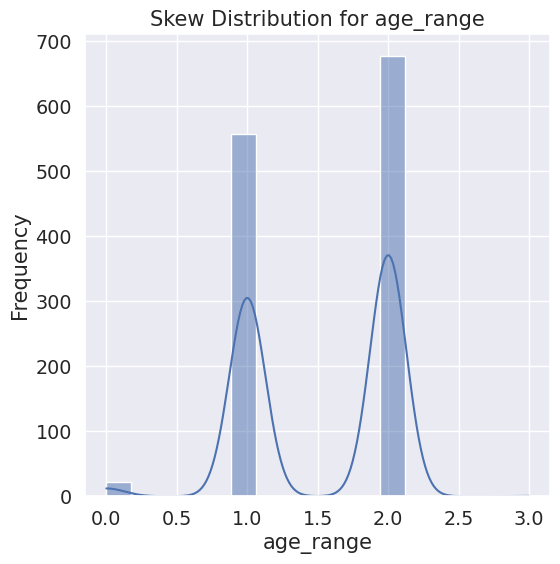

In [48]:


# Assuming 'data' DataFrame from the provided code is available

for col in data.columns:
    plt.figure(figsize=(6, 6))  # Adjust figure size as needed
    sns.histplot(data[col], kde=True)
    plt.title(f'Skew Distribution for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Building Model

1.   Splitting data into 75% training and 25% testing sets is essential to evaluate how well a machine learning model generalizes to unseen data.
* X_train: DataFrame containing the features for the training set.
* X_test: DataFrame containing the features for * the testing set.
* y_train: Series containing the target variable for the training set.
* y_test: Series containing the target variable for the testing set.



2.   Applied Hyperparameter Tuned Random Forest:
* Random Forest Metrics: Accuracy: 0.8254,
Precision: 0.7865,
Recall: 0.9152,
F1-Score: 0.8459,
ROC-AUC: 0.8209

3. Applied Hyperparameter Tuned XGBoost:
* XGBoost Metrices: Accuracy: 0.8222,
Precision: 0.7978,
Recall: 0.8848,
F1-Score: 0.8391,
ROC-AUC: 0.8709




In [49]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'treatment' is your target variable
X = data.drop('treatment', axis=1)  # Features
y = data['treatment']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # Adjust test_size and random_state as needed


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search CV
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist,
                                   n_iter=20, scoring='f1', cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Best Model
best_rf_model = random_search.best_estimator_

# Predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("Best Random Forest Hyperparameters:", random_search.best_params_)
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")



Best Random Forest Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}
Random Forest Metrics:
Accuracy: 0.8254
Precision: 0.7865
Recall: 0.9152
F1-Score: 0.8459
ROC-AUC: 0.8209


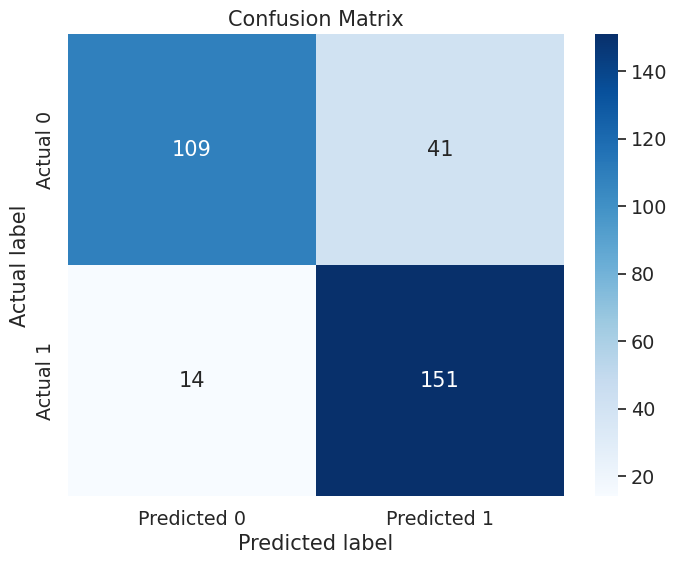

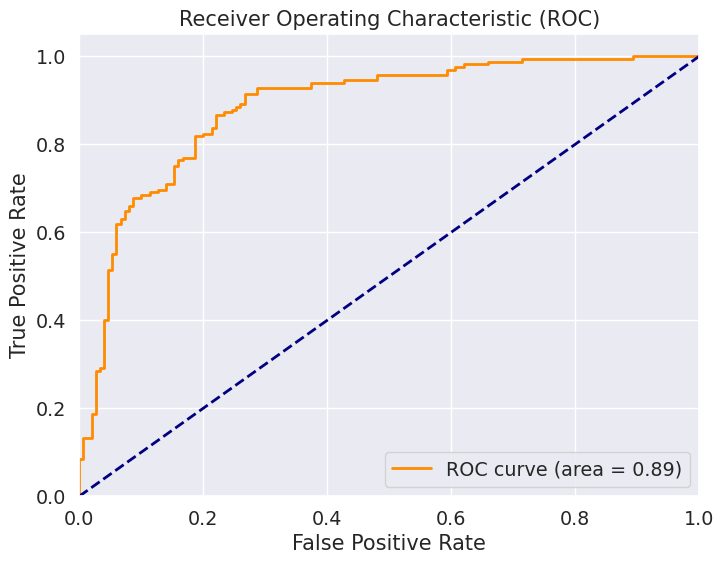

In [56]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_rf are already defined from your previous code

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


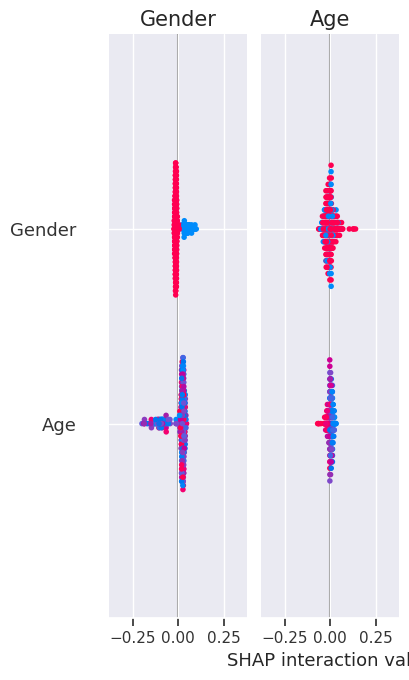

In [51]:
import shap
# 3. Model Interpretation with SHAP
# Explain Random Forest predictions using the fitted model (best_rf_model)
explainer_rf = shap.TreeExplainer(best_rf_model) # Changed rf_model to best_rf_model
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, plot_type="bar")



In [52]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Convert the dataset into DMatrix format (required by XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a split
    'objective': ['binary:logistic'],  # For binary classification
    'eval_metric': ['logloss'],  # Evaluation metric
}

# Perform hyperparameter tuning using native XGBoost CV
best_accuracy = 0
best_params = None
best_num_boost_round = 0

for max_depth in param_grid['max_depth']:
    for learning_rate in param_grid['learning_rate']:
        for subsample in param_grid['subsample']:
            for colsample_bytree in param_grid['colsample_bytree']:
                for gamma in param_grid['gamma']:
                    # Set up parameters
                    params = {
                        'max_depth': max_depth,
                        'learning_rate': learning_rate,
                        'subsample': subsample,
                        'colsample_bytree': colsample_bytree,
                        'gamma': gamma,
                        'objective': 'binary:logistic',
                        'eval_metric': 'logloss',
                        'seed': 42,
                    }

                    # Train the model with early stopping
                    evals_result = {}
                    model = xgb.train(
                        params,
                        dtrain,
                        num_boost_round=100,  # Maximum number of boosting rounds
                        evals=[(dtrain, 'train')],
                        evals_result=evals_result,
                        verbose_eval=False,
                    )

                    # Make predictions
                    y_pred_prob = model.predict(dtest)
                    y_pred = (y_pred_prob > 0.5).astype(int)

                    # Calculate accuracy
                    accuracy = accuracy_score(y_test, y_pred)

                    # Update best parameters if current model is better
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = params
                        best_num_boost_round = len(evals_result['train']['logloss'])  # Number of boosting rounds used

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
print("Best Number of Boosting Rounds:", best_num_boost_round)

# Train the final model with the best hyperparameters
final_model = xgb.train(best_params, dtrain, num_boost_round=best_num_boost_round)

# Make predictions with the final model
y_pred_prob = final_model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation Metrics
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob)  # Use probabilities for ROC-AUC

print("\nXGBoost Metrics (After Hyperparameter Tuning):")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")

Best Hyperparameters: {'max_depth': 7, 'learning_rate': 0.2, 'subsample': 0.8, 'colsample_bytree': 1.0, 'gamma': 0, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'seed': 42}
Best Number of Boosting Rounds: 100

XGBoost Metrics (After Hyperparameter Tuning):
Accuracy: 0.8222
Precision: 0.7978
Recall: 0.8848
F1-Score: 0.8391
ROC-AUC: 0.8709


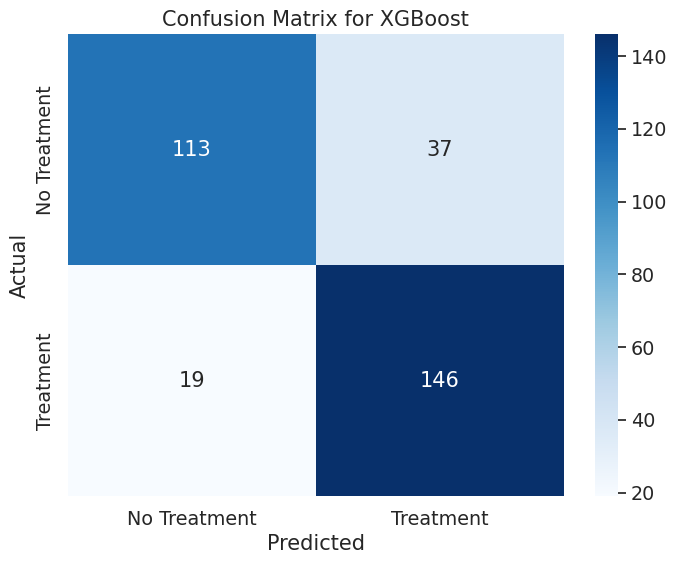

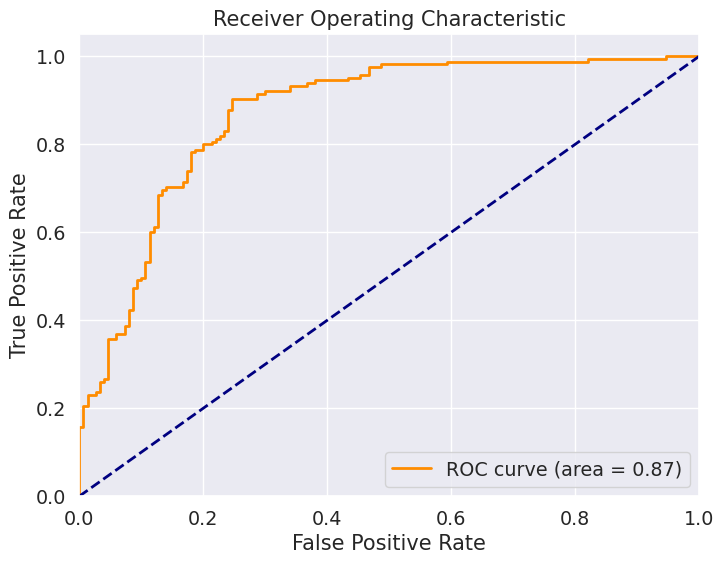

In [53]:
# prompt: plot confusion matrix and roc curve

# Confusion Matrix
# Assign predictions from the final model
y_pred_xgb = final_model.predict(dtest)  # Get predictions using dtest
y_pred_xgb = (y_pred_xgb > 0.5).astype(int)  # Convert to binary predictions (0 or 1)

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Treatment', 'Treatment'],
            yticklabels=['No Treatment', 'Treatment'])
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ROC Curve
y_prob_xgb = final_model.predict(dtest) # Probabilities for the positive class using dtest
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

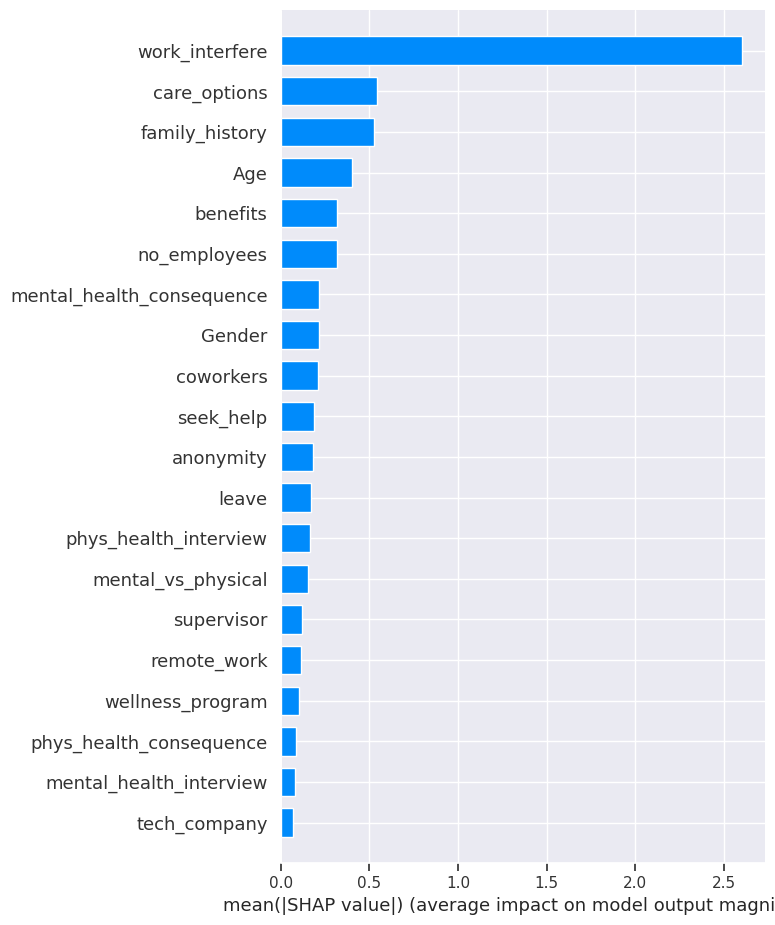

In [54]:
# Explain XGBoost predictions
# The xgb_model was not trained, using final_model which was trained instead
explainer_xgb = shap.TreeExplainer(final_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")

## Model Selection: XGBoost vs. Random Forest  

### **Comparison of Metrics:**  

| Metric       | XGBoost | Random Forest |
|-------------|---------|--------------|
| **Accuracy**    | 0.8222  | **0.8254**   |
| **Precision**   | **0.7978** | 0.7865   |
| **Recall**      | 0.8848  | **0.9152**   |
| **F1-Score**    | 0.8391  | **0.8459**   |
| **ROC-AUC**     | **0.8709**  | 0.8209   |

### **Which Model to Choose?**  

#### **1. If Interpretability is Important:**  
- Random Forest provides better feature importance analysis, making it easier to explain predictions.  

#### **2. If Performance is Key:**  
- **XGBoost** has a higher **ROC-AUC (0.8709)**, indicating better class separation.  
- **Random Forest** has slightly better **accuracy (0.8254)** and **recall (0.9152)**, meaning it captures more positive cases.  

#### **3. If Handling Large Data Efficiently:**  
- **XGBoost** is optimized for large datasets and computational efficiency.  
- **Random Forest** is more robust to noise but can be slower.  

### **Final Recommendation:**  
- If **recall (capturing all mental health cases)** is the priority → **Random Forest** is better.  
- If **overall performance, precision, and ROC-AUC** matter more → **XGBoost** is the best choice.  

**✅ Recommended: XGBoost(final_model)** for its better trade-off between precision and recall.


In [57]:
import joblib # Import the joblib library

joblib.dump(final_model, "mental_health_model.pkl")

['mental_health_model.pkl']